<h1 style = "text-decoration: underline; font-weight: bold;">Introduction</h1>
<br>

In this notebook, I use 214 different of samples of glass, which include, the <a style = "font-style: italic;">refractive index</a> and the <a style = "font-style: italic;">chemical composition</a> of the glass made up of:
<pre>
• Sodium              • Magnesium
• Aluminium           • Silicon
• Potassium           • Calcium
• Barium              • Iron
</pre>
<br>
The main objective of the algorithm is to accurately predict the type of glass from a sample which is linked to a crime and can therefore provide foresic evidence.

Glass left at crime scenes are often the most common and important pieces of foresic evidence submitted [1]. Unlike other pieces of forensic evidence, such as biological or fingerprints, glass does not degrade over time and can link a suspect to a crime scene. 
Different methods of production and different compositions of glass cause variations in the physical and chemical properties of the glass. 
'These small fragments can be transferred to the clothing, hair or footwear of anyone in the vicinity of the glass as it breaks' [1], Therefore making glass, important and useful evidence in foresic investigations.
<br>

<h2 style = "font-size: 20px; text-decoration: underline;">Data preprocessing:</h2>
The data preprocessing done for this sample was the formatting of the raw data to a csv file that can be used in this notebook, In addition, I added the Labels for the data to the top of the CSV so we can identify what each datum references.

<br>
<br>

<h1 style = "text-decoration: underline; font-weight: bold;">Importing Libraries</h1>
<br>
We will start by importing numpy, pandas, matplot, seaborn and Sklearn.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

Now, we will declare variables and constants that will be used often throughout the entire notebook.

In [36]:
#Loading the provided data into a variable called data_frame:
data_frame = pd.read_csv('glass.csv')

feature_frame = data_frame.iloc[:,0:-1]
label_frame = data_frame[['Target']]

<h1 style = "text-decoration: underline; font-weight: bold;">Exploratory Analysis</h1>
<br>
Before building the model, I am going to explore the provide data to get a better understanding of what each datapoint is representing and seeing any early patterns that may exist.

<br>

The glass types we have are:
<pre>
1 - Building Windows Float Proccessed
2 - Building Windows Non-Float Proccessed
3 - Vehicle Windows Float Processed
4 - Vehicle Windows Non-Float Processed
5 - Containers
6 - Tableware
7 - Headlamps
</pre>

<br>
Firstly, By creating a scatterplot for each element, We can start to see patterns in the data and composition that tells us which glass type the sample is most likely to be.

Text(0, 0.5, '')

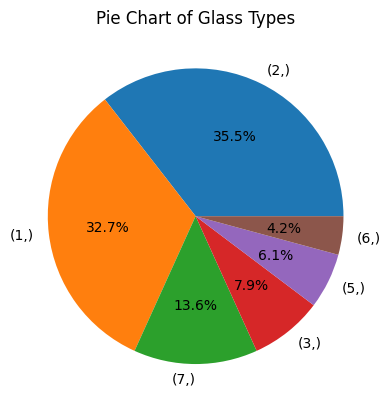

In [43]:
label_frame.value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Pie Chart of Glass Types')
plt.ylabel('')

The pie chart above shows how the dataset is made up. It indicates that around 1/3 of the data is made up of glass type 2, Building Windows Non-Float Processed, whilst another 1/3 is made of glass type 1, Building Windows Float Processed.

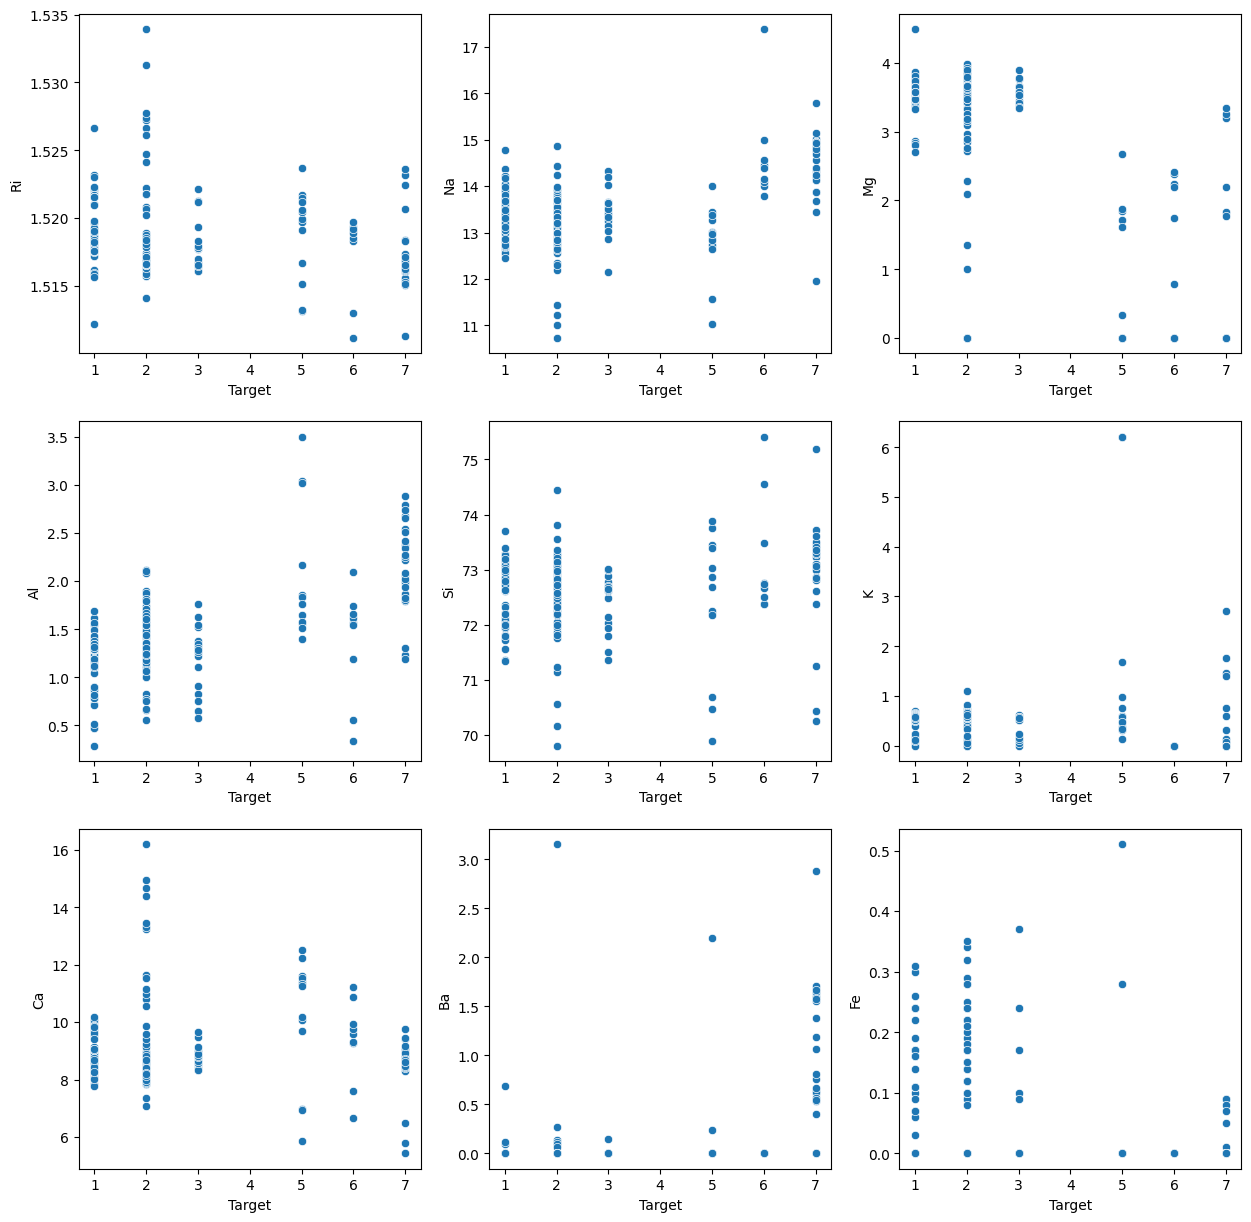

In [35]:
fig, axs = plt.subplots(3, 3,figsize=(15, 15))
plt.subplot(3,3,1)
sns.scatterplot(x="Target", y="Ri", data=data_frame)
plt.subplot(3,3,2)
sns.scatterplot(x="Target", y="Na", data=data_frame)
plt.subplot(3,3,3)
sns.scatterplot(x="Target", y="Mg", data=data_frame)
plt.subplot(3,3,4)
sns.scatterplot(x="Target", y="Al", data=data_frame)
plt.subplot(3,3,5)
sns.scatterplot(x="Target", y="Si", data=data_frame)
plt.subplot(3,3,6)
sns.scatterplot(x="Target", y="K", data=data_frame)
plt.subplot(3,3,7)
sns.scatterplot(x="Target", y="Ca", data=data_frame)
plt.subplot(3,3,8)
sns.scatterplot(x="Target", y="Ba", data=data_frame)
plt.subplot(3,3,9)
sns.scatterplot(x="Target", y="Fe", data=data_frame)

plt.show()

The scatterplots show that Target 4, Vehicle Windows Non-Float Processed, has no samples present in the dataset. It may be possible to make a prediction about Target 4 from this dataset by looking at which elemental composition pattern is not 'used' by the other glass types, however this makes assumptions that there are no more than the 7 glass types and that the composition of glass type 4 is different to the other 6 types.

The Scatterplots above give a good understanding of each type composition. For example, it shows that Type 1 generally has Ca in the range of 8 - 10. It also shows outliers, such as target 5, which has iron and the top, middle and bottom of the range, therefore may suggest that Iron composition in type 5 is unpredictable and cannot be used as an accurate measurement for glass type alone, however with only 3 samples, the sample size is quite low so cannot be said for sure.